# Linear algebra and NumPy

This morning we will revisit some linear algebra using the NumPy library in python. 

**For the following exercises, use numpy vector/matrix operations. Do not use a for loop unless given explicit instructions**

## Part 0: Important Numpy Notes:

In an numpy array, a **row vector** is defined as:

```python
a = np.array([[1, 2, 3]])
```
The shape of `a` is `(1, 3)`.

A **column vector** is defined as:
```python
b = np.array([[1], [2], [3]])
```
The shape of `b` is `(3, 1)`.

Ensure that you check the `shape` of all the vectors throughout the exercise.
If the shape is missing a value, i.e. `(3,)` or  `(,3)`, use `np.newaxis` to
restore the correct dimensions.

In [1]:
import numpy as np

## Part 1: Linear Algebra Practice:

### Part 1.1

The [stochastic matrix](https://en.wikipedia.org/wiki/Stochastic_matrix) or a Markov Matrix is a useful mathematical construct.  It is used to characterize transitions for a finite [Markov chain](https://en.wikipedia.org/wiki/Markov_chain). [A markov chain](https://en.oxforddictionaries.com/definition/us/markov_chain) can be described as follows:

>a stochastic model describing a sequence of possible events in which the probability of each event depends only  on the state attained in the previous event.

The stoichastic matrix is a square matrix specifying the probabilities of going from one state to the other such that every column of the matrix sums to 1.

The probability of entering a certain state depends only on the last state occupied and the stochastic matrix, not on any earlier states.

Suppose that the 2004 **state of land use** in a city of 60 $\textrm{miles}^2$ of built-up
area is:



```
In 2004:
   
C (Commercially Used): 25%
I (Industrially Used): 20%
R (Residentially Used): 55%
```

Find the **state of land use** in **2009** and **2014**,
assuming that the transition probabilities for 5-year intervals are given
by the matrix **A** and remain practically the same over the time considered.

The following matrix can help visualize this process:

$$
    \mathbf{A} =
    \begin{pmatrix}
    C\rightarrow C & I\rightarrow C & R \rightarrow C \\ 
    C\rightarrow I & I\rightarrow I & R \rightarrow I \\ 
    C\rightarrow R & I\rightarrow R & R \rightarrow R \\ 
    \end{pmatrix}
    = 
    \begin{pmatrix}
    0.7 & 0.1 & 0.0\\ 
    0.2 & 0.9 & 0.2\\ 
    0.1 & 0.0 & 0.8\\
    \end{pmatrix}
$$

In [2]:
# Question 1
# Create the stochastic matrix shown above
transitions = np.array([[.7,.1,0,.2,.9,.2,.1,0,.8]]).reshape(3,3)
transitions

array([[0.7, 0.1, 0. ],
       [0.2, 0.9, 0.2],
       [0.1, 0. , 0.8]])

In [3]:
# Question 2
# Create a vector representing the initial state of land use
init_landuse = np.array([[.25,.2,.55]]).T
init_landuse

array([[0.25],
       [0.2 ],
       [0.55]])

In [4]:
# Question 3
# Determine the state of land use in 2009
land_2009 = transitions.dot(init_landuse)
land_2009

array([[0.195],
       [0.34 ],
       [0.465]])

In [5]:
# Question 4
# Determine the state of land use in 2014
land_2014 = transitions.dot(land_2009)
#land_2014[:,0]
#land_2014[1,0]
land_2014

array([[0.1705],
       [0.438 ],
       [0.3915]])

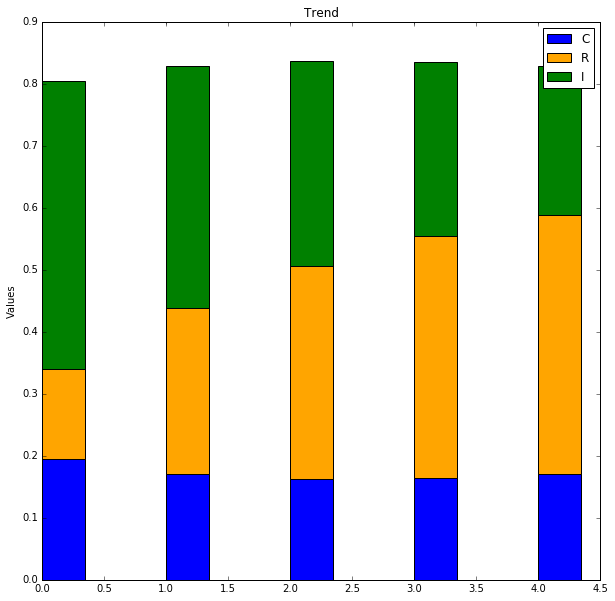

In [6]:
# Extra credit
# look at the following example plot and modify it to visualize the trend until 2029

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

land_2019 = transitions.dot(land_2014)
land_2024 = transitions.dot(land_2019)
land_2029 = transitions.dot(land_2024)
# np.dot(transitions, land_2019)

N = 5
C = [land_2009[0,0],land_2014[0,0],land_2019[0,0],land_2024[0,0],land_2029[0,0]]
I = [land_2009[1,0],land_2014[1,0],land_2019[1,0],land_2024[1,0],land_2029[1,0]]
R = [land_2009[2,0],land_2014[2,0],land_2019[2,0],land_2024[2,0],land_2029[2,0]]




ind = np.arange(N)    # the x locations for the groups
width = 0.35          # the width of the bars: can also be len(x) sequence

p1 = ax.bar(ind, C, width, color='blue')
p2 = ax.bar(ind, I, width, color='orange',bottom=C)
p3 = ax.bar(ind, R, width, color='green',bottom=I)


ax.set_ylabel('Values')
ax.set_title('Trend')
ax.set_xticks(ind, ('1', '2', '3', '4', '5'))
#plt.yticks(np.arange(0, 81, 10))
ax.legend((p1[0], p2[0], p3[0]), ('C', 'R','I'))
pass
